In [150]:
from scipy.integrate import ode
from typing import List
import matplotlib.pyplot as plt
from sympy import symbols, solveset, Eq

In [151]:

def my_ode(x0: List[float], t0: float, t_end, dt, func):
    r = ode(func)
    r.set_initial_value(x0, t0)
    result_x = []
    result_y = []
    while r.successful() and r.t < t_end:
        result = r.integrate(r.t+dt)
        result_x.append(result[0])
        result_y.append(result[1])
    return [result_x, result_y]

In [152]:
a1, b1, q1, a2, b2, q2, m = 1, 1, 1, 2, 2, 2, 2
def f(t: float, x: List[float]):    
    x, y = x[0], x[1]
    dx = [0, 0]
    dx[0] = a1 / (b1 + y ** m) - q1 * x
    dx[1] = a2 / (b2 + x ** m) - q2 * y 
    return dx

    
# вычисление первого приближения:
# dx[0] ~ ax + by
# a = d(dx[0])/d(x) | (0, 0) = -q1
# b = d(dx[0])/d(y) | (0, 0) = (-a1 * m * y^m) / (y^(2m+1) + 2 * b1 * y^(m+1) + b^2 * x) | (0, 0) ~ 0 / b^2 = 0
# соответственно 
# dx[1] ~ cx + dy
# c = 0, d = -q2
a, b, c, d = -q1, 0, 0, -q2 
L = symbols('x')
solveset(Eq(L * L - (a + d) * L + (a * d - b * c), 0), L)

{-2, -1}

L1 и L2 - действительные, одного знака -> тип невырожденной особой точки - "устойчивый узел"

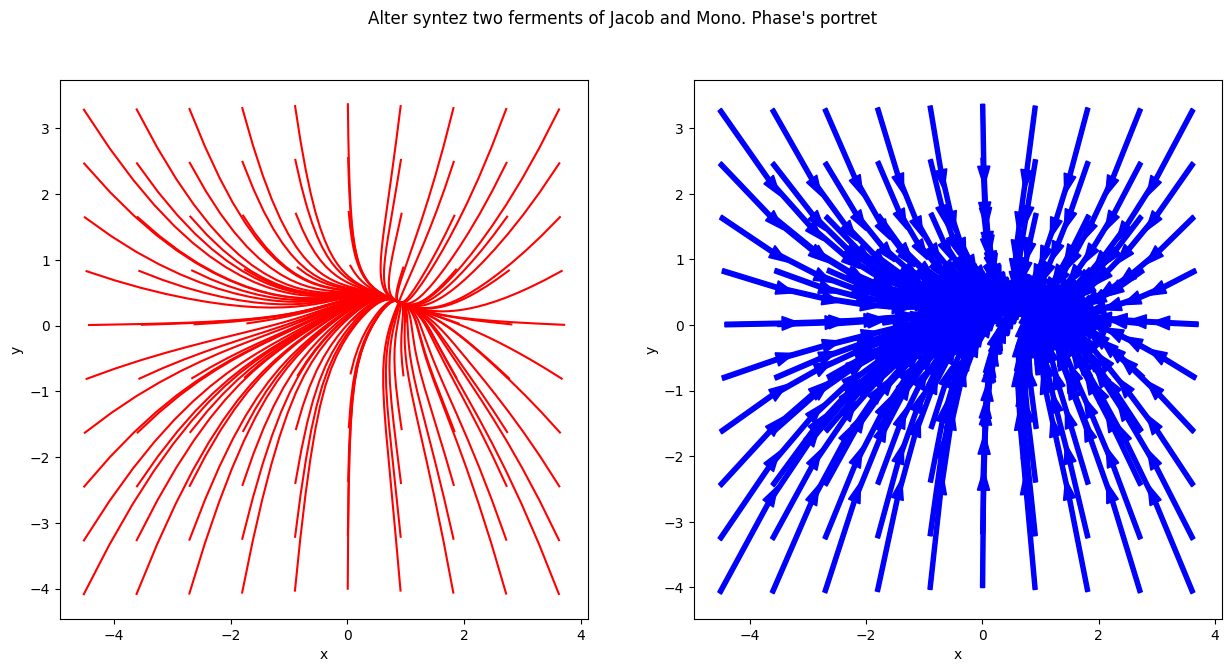

In [153]:
plt.rcParams['figure.figsize'] = [15, 7]

plt.suptitle('Alter syntez two ferments of Jacob and Mono. Phase\'s portret')
for x0 in range (-5, 5):
    for y0 in range (-5, 5):
        result = my_ode([x0, y0], -10, 10, 0.1, f)
        ax1 = plt.subplot(1, 2, 1)
        ax1.set_xlabel('x')
        ax1.set_ylabel('y')
        plt.plot(result[0], result[1], color='r')
        for i, _ in enumerate(result[0]):
            if i % 2 == 0 and len(result[0]) > i + 2:
                ax2 = plt.subplot(1, 2, 2)
                ax2.set_xlabel('x')
                ax2.set_ylabel('y')
                plt.arrow(result[0][i], result[1][i], result[0][i+2]-result[0][i], result[1][i+2]-result[1][i], width=0.07, color='b',)